In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [13]:

default_image_size = tuple((256, 256))
directory_root = 'C:/Users/Sakib Mukter/Desktop/RiceProject/Segmented/CrowdAI-Train-Test/color'
width=256
height=256
depth=3

[INFO] Loading images ...
Processing:  Apple___Apple_scab
Images:  620


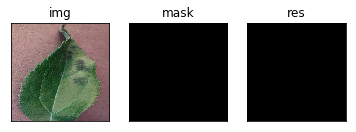

Processing:  Apple___Black_rot
Images:  611


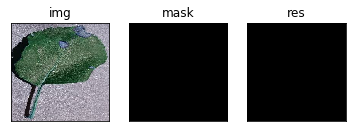

Processing:  Apple___Cedar_apple_rust
Images:  265


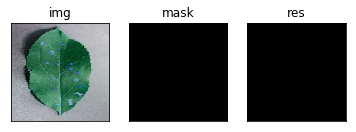

Processing:  Apple___healthy
Images:  1635


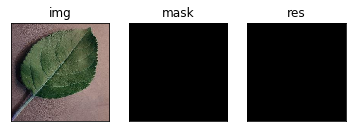

Processing:  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Images:  503


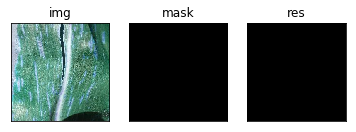

Processing:  Corn_(maize)___Common_rust_
Images:  1182


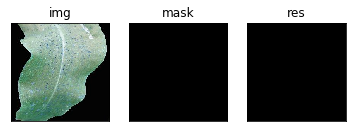

Processing:  Corn_(maize)___healthy
Images:  1152


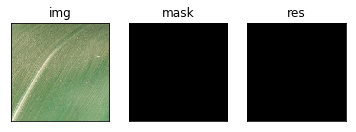

Processing:  Corn_(maize)___Northern_Leaf_Blight
Images:  975


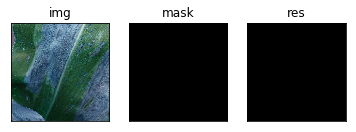

Processing:  Potato___Early_blight
Images:  990


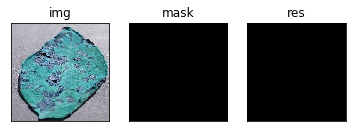

Processing:  Potato___healthy
Images:  142


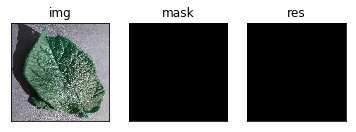

Processing:  Potato___Late_blight
Images:  990


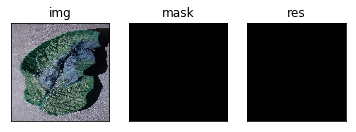

Processing:  Tomato___Bacterial_spot
Images:  2117


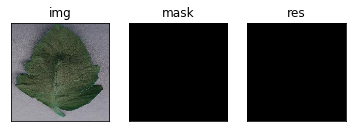

Processing:  Tomato___Early_blight
Images:  990


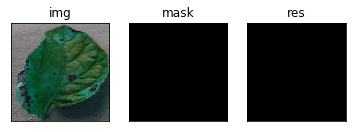

Processing:  Tomato___healthy
Images:  1581


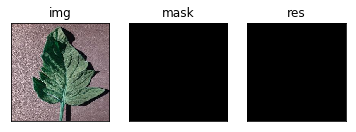

Processing:  Tomato___Late_blight
Images:  1899


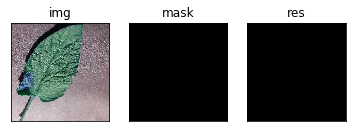

Processing:  Tomato___Leaf_Mold
Images:  942


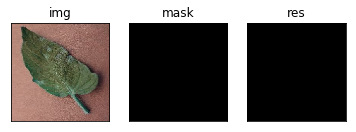

Processing:  Tomato___Septoria_leaf_spot
Images:  1761


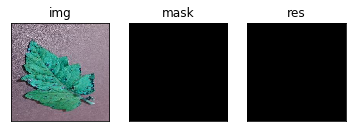

Processing:  Tomato___Spider_mites Two-spotted_spider_mite
Images:  1666


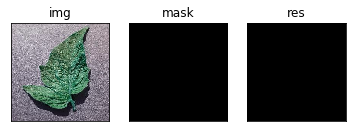

Processing:  Tomato___Target_Spot
Images:  1394


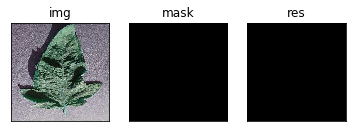

Processing:  Tomato___Tomato_mosaic_virus
Images:  363


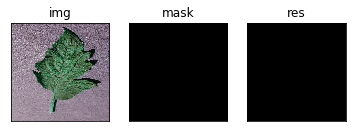

Processing:  Tomato___Tomato_Yellow_Leaf_Curl_Virus
Images:  5347


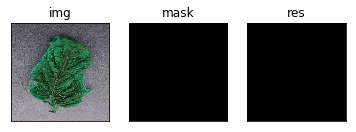

In [60]:
image_list, label_list = [], []
write_dir = 'C:/Users/Sakib Mukter/Desktop/RiceProject/Segmented/Processed/'

print("[INFO] Loading images ...")
root_dir = listdir(directory_root)
for img_folder in root_dir:
    print("Processing: ",img_folder)
    plant_disease_image_list = listdir(f"{directory_root}/{img_folder}/")
    print("Images: ",len(plant_disease_image_list))
    for img_name in plant_disease_image_list:
        img_url = directory_root + '/' + img_folder + '/' +img_name
        img = cv2.imread(img_url) #reading image
        # hue sat value -hsv
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        #Green upper and lowerbound
        lower_green = np.array([107,52,100])
        upper_green = np.array([60, 255, 255])
        
        mask = cv2.inRange(hsv, lower_green, upper_green)
        res = cv2.bitwise_and(img,img, mask= mask)
        plt.subplot(131),plt.imshow(img,cmap = 'gray'),plt.title("img")
        plt.xticks([]), plt.yticks([])
        plt.subplot(132),plt.imshow(mask,cmap = 'gray'),plt.title('mask')
        plt.xticks([]), plt.yticks([])
        plt.subplot(133),plt.imshow(res,cmap = 'gray'),plt.title('res')
        plt.xticks([]), plt.yticks([])
        plt.show()
        
        img_write = write_dir + '/' + img_folder + '/' + img_name
        cv2.imwrite(img_write,res)
       
        break
        
    
     

In [29]:
import os

In [32]:
write_dir = 'C:/Users/Sakib Mukter/Desktop/RiceProject/Segmented/Processed/'


In [36]:
# for c in root_dir:
#     dira = write_dir + '/' + c
#     os.mkdir(dira)